## Data Pre Processing

### Import libreries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter


### Load Data

In [64]:
df=pd.read_csv('ai4i2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

#### Checking Machine failure values 

In [65]:
## Using 'TWF','HDF','PWF','OSF','RNF' to validate Machine failure values, according to the rules of the dataset 
df.loc[(df['TWF']==1) | (df['HDF']==1) | (df['PWF']==1) | (df['OSF']==1) | (df['RNF']==1), 'Machine failure'] = 1
df.loc[(df['TWF']==0) & (df['HDF']==0) & (df['PWF']==0) & (df['OSF']==0) & (df['RNF']==0), 'Machine failure'] = 0

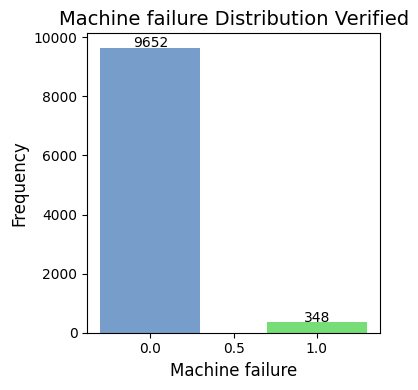

In [66]:
# Get the frequency count for each category in the 'Machine failure' column
a = df["Machine failure"].value_counts()

# Define labels (x-axis) and values (y-axis) for the bar plot
x = a.index[:2]  # Extract the firts two labels ('0', '1', assuming they are the most frequent)
y = a.values[:2]  # Extract the corresponding frequencies

# Create the bar plot
plt.figure(figsize=(4, 4))  # Set the figure size
pastel_dark_colors = ['#779ecb','#77dd77']
plt.bar(x, y, color=pastel_dark_colors, width=0.6) 

# Add title and labels for the axes
plt.title('Machine failure Distribution Verified', fontsize=14)
plt.xlabel('Machine failure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
    
# Add labels with the values below each bar
for i in range(len(x)):
    plt.text(i, y[i] + 400, str(y[i]), ha='center', va='top', fontsize=10, color='black')  # Position text below the bars

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Deleting unnecesary features

In [67]:
#Delete Product ID and UDI, these features affect nothing
df=df.drop(['Product ID','UDI'] ,axis=1)
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [68]:
#Also deleting 'TWF','HDF','PWF','OSF','RNF'. These have already been used to validate Machine failure values 
df=df.drop(['TWF','HDF','PWF','OSF','RNF'] ,axis=1)
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


#### Applying Dummy

In [69]:
# Dummy to the feature Type. This has three kind of values: L, M nd H
df = pd.get_dummies(df)

# Identify the columns that were created by pd.get_dummies() (those that are of dtype 'bool')
dummy_columns = df.select_dtypes(include=['bool']).columns

# Convert only the dummy columns (boolean) to integers (0 and 1)
df[dummy_columns] = df[dummy_columns].astype(int)

# Display the first 5 rows of the DataFrame
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0


In [71]:
df.to_csv('../DataModeling/Dataset.csv', index=False)